In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.pandas.set_option("display.max_columns",None)

In [2]:
data = pd.read_csv("/content/Student_performance_data _.csv")

In [3]:
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [4]:
for feature in data.columns:
  print(feature,"  ",data[feature].isnull().sum())

StudentID    0
Age    0
Gender    0
Ethnicity    0
ParentalEducation    0
StudyTimeWeekly    0
Absences    0
Tutoring    0
ParentalSupport    0
Extracurricular    0
Sports    0
Music    0
Volunteering    0
GPA    0
GradeClass    0


## check for imbalanceness of the dataset

<Axes: xlabel='GradeClass', ylabel='count'>

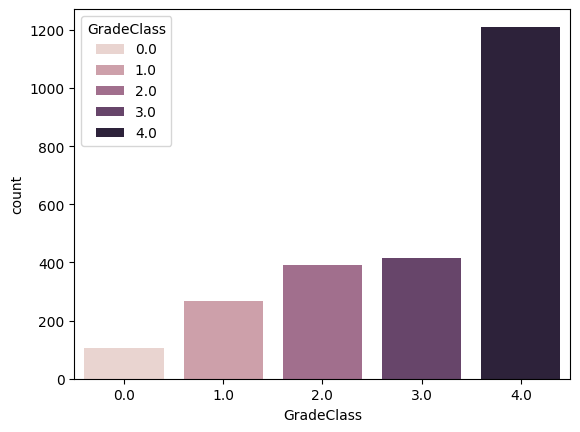

In [12]:
sns.barplot(x=data["GradeClass"].value_counts().index,y=data["GradeClass"].value_counts(),hue=data["GradeClass"].value_counts().index)

From the above observations we can say that the dataset is imbalanced so we need to balance it.

In [13]:
new_data = data.copy()

In [14]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

In [17]:
x = new_data.drop("GradeClass",axis=1)
y = new_data["GradeClass"]

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) # Change X to x

In [20]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [21]:
print("Before SMOTE:", pd.Series(y_train).value_counts())
print("After SMOTE:", pd.Series(y_train_resampled).value_counts())

Before SMOTE: GradeClass
4.0    974
3.0    328
2.0    306
1.0    220
0.0     85
Name: count, dtype: int64
After SMOTE: GradeClass
4.0    974
1.0    974
2.0    974
3.0    974
0.0    974
Name: count, dtype: int64


the balanced data can be used to train the model